In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

C:\Users\shubhamkumar.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1283, 32, 32, 1)
here2:  (3, 1283)
shape of input data:  (1283, 32, 32, 1)
shape of target variable:  (1283, 3)


In [2]:
X_train, Y_train, _ = load_data('data')
X_test, Y_test, _ = load_data('data')
print(Y_train)

(1283, 32, 32, 1)
here2:  (3, 1283)
shape of input data:  (1283, 32, 32, 1)
shape of target variable:  (1283, 3)
(1283, 32, 32, 1)
here2:  (3, 1283)
shape of input data:  (1283, 32, 32, 1)
shape of target variable:  (1283, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [3]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, [None, 32,32,1])
    Y = tf.placeholder(tf.float32,[None, 3])
    
    return X, Y

In [4]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", [5,5,1,6], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [5,5,6,16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    #W3 = tf.get_varaible("W3", [400,120], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    #W4 = tf.get_varaible("W4", [120,84], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    parameters = {"W1":W1,
                 "W2":W2}
    
    return parameters
    

In [5]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding ='VALID')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')
    #layer2
    Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding ='VALID')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')
    #layer3
    P = tf.contrib.layers.flatten(P2)
    #Z3 = tf.contrib.layers.fully_connected(P,400,activation=tf.nn.relu) 
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = 0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(P,fc1_w) + fc1_b
    Z3 = tf.nn.relu(fc1)
    #layer4
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = 0, stddev = 0.1))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(Z3,fc2_w) + fc2_b
    Z4 = tf.nn.relu(fc2)
    #layer5
    #Z4 = tf.contrib.layers.fully_connected(Z3,3,activation_fn='None')
    #Z4 = tf.contrib.layers.fully_connected(Z3,3,'None')
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,3), mean = 0 , stddev = 0.1))
    fc3_b = tf.Variable(tf.zeros(3))
    Z5 = tf.matmul(Z4, fc3_w) + fc3_b
    
    
    return Z5

In [6]:
def compute_cost(Z5, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z5, labels=Y))
    
    return cost

In [7]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.009,
         num_epochs=64, minibatch_size=32,print_cost=True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    (m,n_H0,n_W0,n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    print("n_y: ", n_y)
    costs=[]
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    
    Z5 = forward_propagation(X, parameters)
    cost = compute_cost(Z5, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            print("after epoch")
            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z5, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

n_y:  3
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

after epoch
Cost after epoch 0: 0.983714
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 5: 0.085403
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 10: 0.022754
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 15: 0.024471
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 20: 0.038921
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 25: 0.006226
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 30: 0.015093
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 35: 0.000651
after epoch
after epoch
after epoch
after epoch
after epoch
Cost after epoch 40: 0.000102
after epoch
after epoch
after epoch
afte

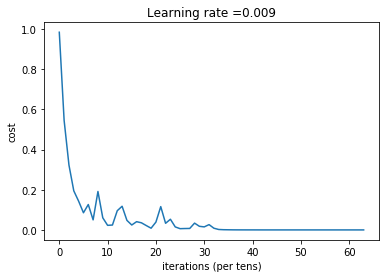

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 1.0
Test Accuracy: 1.0


In [8]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)